<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/chiel/testing_segments%2Bpartioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed
!pip install minisom
!pip install umap-learn
!pip install kmodes


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=018beb3a9c354a06a844ff88ea44a0a5b5a071d1085a51b3118516868b057475
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [2]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster



In [7]:
df = pd.read_csv('data_clean.csv')

In [8]:
pd.set_option("display.max_columns", None)

df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['vendor_count', 'product_count', 'is_chain', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
       'Total_Orders_Per_Client', 'mnt', 'mnt_Per_Order', 'Items_Per_Order',
       'frq', 'rcn', 'activity', 'Loyalty', 'Age_Group', 'CLV_Score',
       'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
       'Orders_Evening', 'Orders_Dusk', 'RFM_Score', 'customer_region_0',
       'customer_region_1', 'customer_region_2', 'customer_region_3'],
      dtype='object')

In [9]:
columns_to_scale = ['CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

# Using numpy's log1p for logarithmic scaling (adds 1 before taking log to handle zeros)
df[columns_to_scale] = np.log1p(df[columns_to_scale])

In [10]:
df.describe()

,vendor_count,product_count,is_chain,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,Loyalty,Age_Group,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,RFM_Score,customer_region_0,customer_region_1,customer_region_2,customer_region_3
count,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.00000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000,31737.000000
mean,2.918581,4.932445,2.252891,0.888364,1.015187,0.808127,1.086393,0.391811,0.111254,0.191453,0.248405,0.149683,0.159268,0.264351,0.491319,0.485702,0.142067,0.513153,0.398438,0.166312,0.558339,0.570029,0.593503,0.622081,0.680814,0.655796,0.707471,3.686927,33.267142,9.844285,1.283130,0.347879,26.941015,36.45061,0.161565,1.771749,0.066017,0.285219,0.331348,1.078394,1.048020,1.336201,0.308851,2.508433,0.117686,0.278193,0.300911,0.303211
std,2.035818,3.931106,1.952278,1.096110,0.605378,1.224583,1.509538,0.930244,0.552123,0.609571,0.756377,0.611424,0.626061,0.801833,1.051639,1.038530,0.561735,1.035424,1.072577,0.617140,1.015171,1.045785,1.047444,1.071099,1.089727,1.071256,1.169202,2.612549,26.736028,6.222479,0.350075,0.390181,22.939355,29.40898,0.228829,0.791278,0.040343,0.907566,0.946374,2.093201,1.834232,2.336247,0.989525,0.606241,0.322241,0.448116,0.458661,0.459653
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.370000,0.370000,1.000000,0.022222,0.000000,1.00000,0.000000,0.000000,0.011496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.020000,5.070000,1.000000,0.076923,8.000000,4.00000,0.000000,1.000000,0.030806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.050000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,24.200000,8.220000,1.166667,0.134328,20.000000,35.00000,0.000000,2.000000,0.055885,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,3.000000,2.000000,1.000000,1.903599,2.554122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,45.180000,12.920000,1.500000,0.600000,41.000000,63.00000,0.333333,2.000000,0.093041,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,2.950000,0.000000,1.000000,1.000000,1.000000
max,8.000000,14.000000,6.000000,3.000000,2.000000,5.639102,6.799847,5.439035,5.790266,5.396623,6.607636,5.442721,5.548337,5.736798,6.151306,6.561229,5.620799,5.905580,6.12128

In [11]:
#scaling
from sklearn.preprocessing import MinMaxScaler
# Store column names
cui_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

region_columns = ['customer_region_0', 'customer_region_1', 'customer_region_2']

# Create new DataFrame
sc_df = df.copy()

# Just scale the already-logged CUI columns
scaler = MinMaxScaler()
sc_df[cui_columns] = scaler.fit_transform(sc_df[cui_columns])

# Region columns remain unchanged
sc_df[region_columns] = df[region_columns]

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def apply_pca(df, variance_threshold=0.95):
    """Apply PCA to retain specified variance threshold"""
    # Initialize PCA without specifying n_components first to analyze variance
    pca = PCA()

    # Fit PCA and transform the data
    sc_pca = pca.fit_transform(df)

    # Calculate number of components needed for threshold
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1

    # Create DataFrame with PCA results
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    sc_pca = pd.DataFrame(sc_pca[:, :n_components], columns=pca_columns, index=df.index)

    return sc_pca

# Apply PCA to scaled features only (CUI columns)
cui_columns = [
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

# Apply PCA only to the scaled CUI columns
sc_pca = apply_pca(sc_df[cui_columns], variance_threshold=0.8)

In [13]:
sc_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.187131,-0.164272,-0.018223,-0.078608,-0.067134,-0.036365,-0.115842,0.512976,-0.154876
1,0.143460,0.294825,-0.033001,-0.076092,-0.155118,-0.066615,-0.114433,-0.034973,-0.011892
2,-0.100843,0.221048,-0.177062,-0.086874,-0.125036,-0.027610,-0.127344,-0.044433,-0.010765
3,0.149223,-0.136876,0.180020,-0.069623,-0.101880,-0.081718,-0.089736,0.450361,-0.135238
4,0.354585,0.334080,0.097143,-0.067616,-0.178507,-0.099266,-0.101180,-0.026735,-0.012544
...,...,...,...,...,...,...,...,...,...
31732,-0.032125,-0.216435,-0.286148,0.239306,-0.195964,-0.005921,0.240401,-0.001725,-0.014550
31733,-0.097701,0.328083,-0.199656,-0.083086,-0.136714,-0.032686,-0.136251,-0.044582,-0.012176
31734,-0.064905,-0.176194,-0.128973,-0.067584,-0.062932,-0.001714,-0.083237,-0.041557,-0.017719
31735,0.199080,-0.149373,0.106029,-0.089493,-0.112901,-0.055620,-0.072069,-0.031643,-0.006082


In [14]:
df.columns


Index(['vendor_count', 'product_count', 'is_chain', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
       'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6',
       'Total_Orders_Per_Client', 'mnt', 'mnt_Per_Order', 'Items_Per_Order',
       'frq', 'rcn', 'activity', 'Loyalty', 'Age_Group', 'CLV_Score',
       'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
       'Orders_Evening', 'Orders_Dusk', 'RFM_Score', 'customer_region_0',
       'customer_region_1', 'customer_region_2', 'customer_region_3'],
      dtype='object')

In [15]:
value_engagement_metrics = [
    # Value
    'mnt', 'mnt_Per_Order', 'CLV_Score', 'RFM_Score',
    # Engagement
    'activity', 'Loyalty', 'frq', 'rcn' ]

preference_metrics = [
    # Cuisine preferences
    'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
    'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
    'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
    'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai'
]

shopping_behavior_metrics = [
    # Shopping patterns
    'vendor_count', 'product_count', 'is_chain', 'last_promo',
    'payment_method', 'Items_Per_Order',
    # Timing preferences
    'Orders_Night', 'Orders_Dawn', 'Orders_Morning', 'Orders_Afternoon',
    'Orders_Evening', 'Orders_Dusk',
    'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6'
]

demographic_metrics = [
    'customer_region_0', 'customer_region_1', 'customer_region_2',
    'customer_region_3', 'Age_Group'
]



In [19]:
# value_engagement_metrics
# preference_metrics
# shopping_behavior_metrics
# demographic_metrics

df_val = df[value_engagement_metrics].copy()
df_pref = df[preference_metrics].copy()
df_shop = df[shopping_behavior_metrics].copy()
df_dem = df[demographic_metrics].copy()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

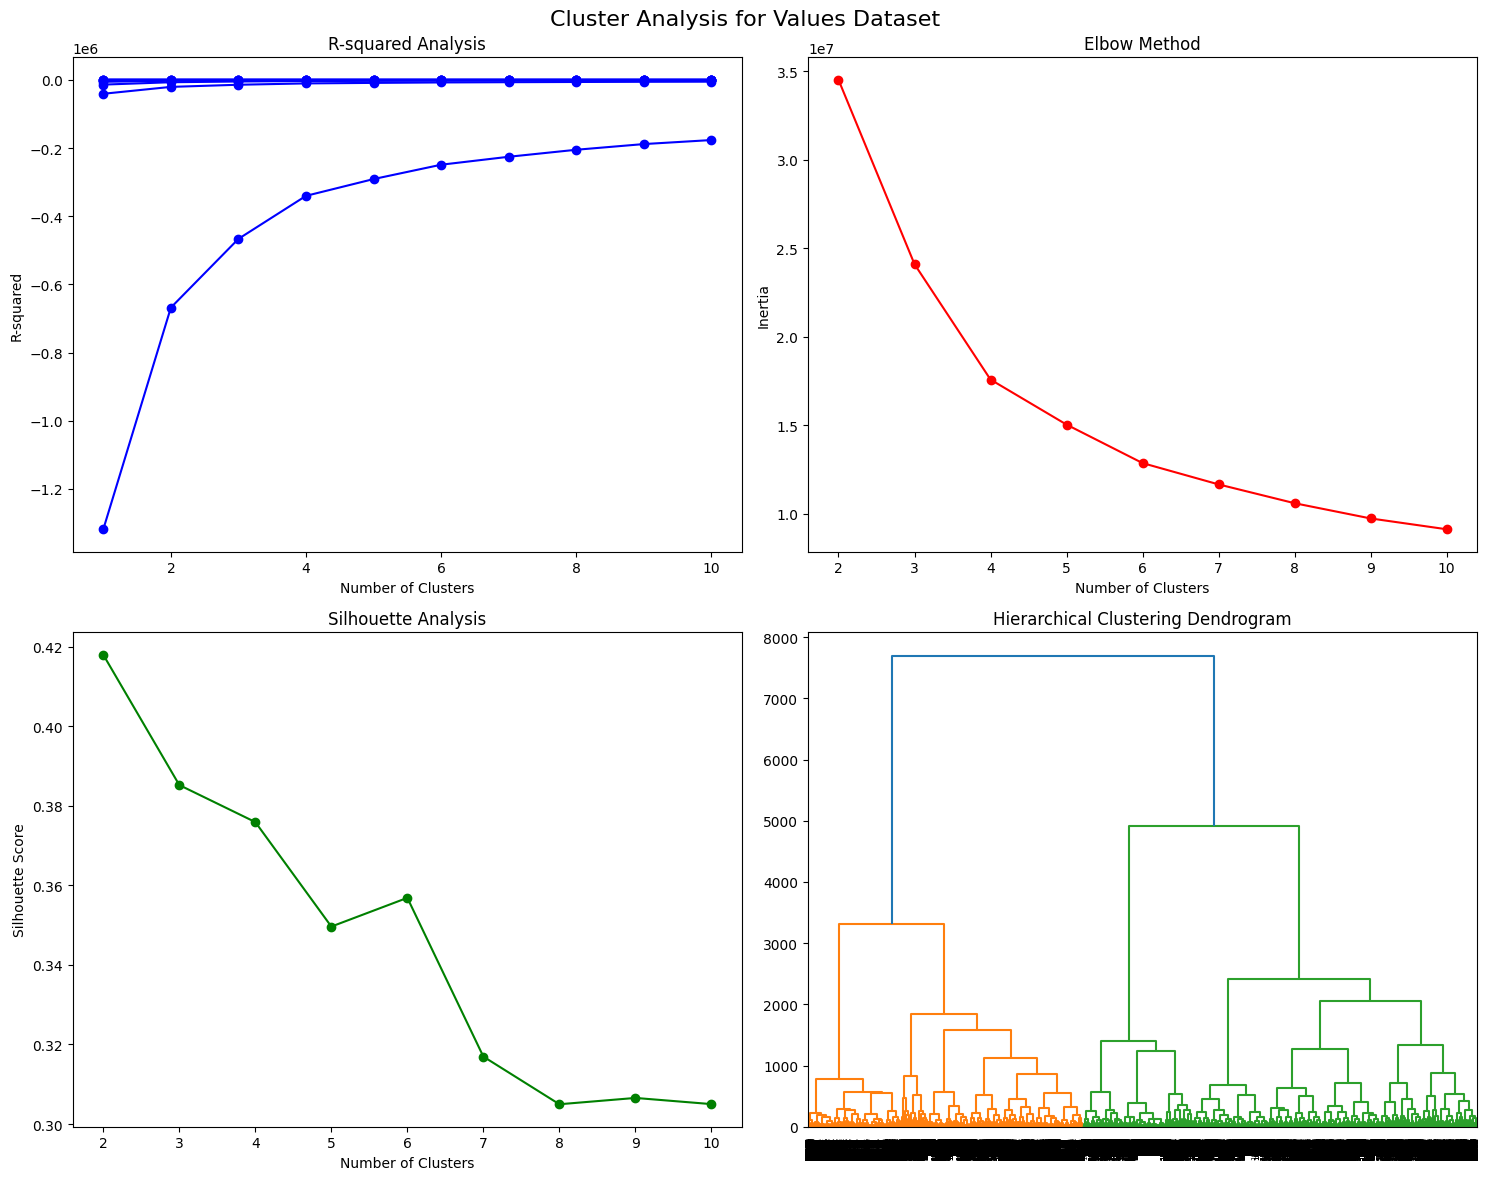


=== Values Dataset Analysis ===
Number of features: 8
Number of samples: 31737
Silhouette Score: 0.376
Inertia: 17577654.865

Cluster Sizes:
Cluster 0: 5884 samples
Cluster 1: 7525 samples
Cluster 2: 9778 samples
Cluster 3: 8550 samples


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

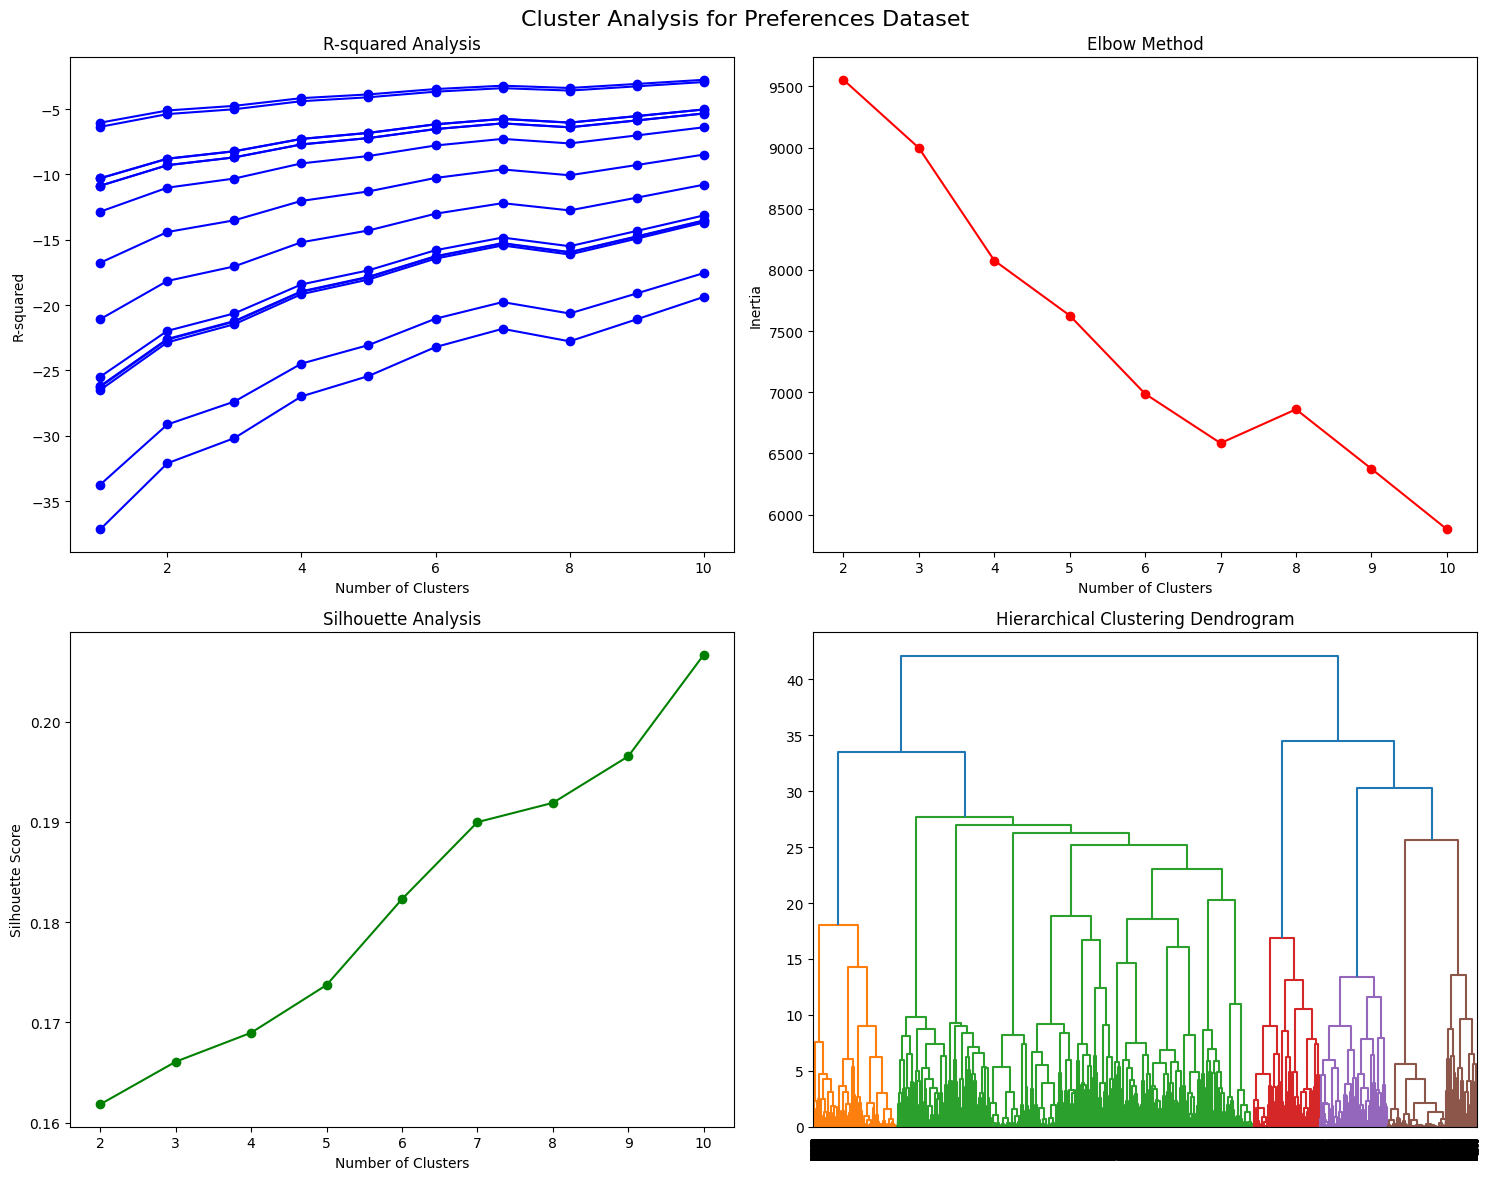


=== Preferences Dataset Analysis ===
Number of features: 15
Number of samples: 31737
Silhouette Score: 0.169
Inertia: 8076.976

Cluster Sizes:
Cluster 0: 7254 samples
Cluster 1: 12968 samples
Cluster 2: 4011 samples
Cluster 3: 7504 samples


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

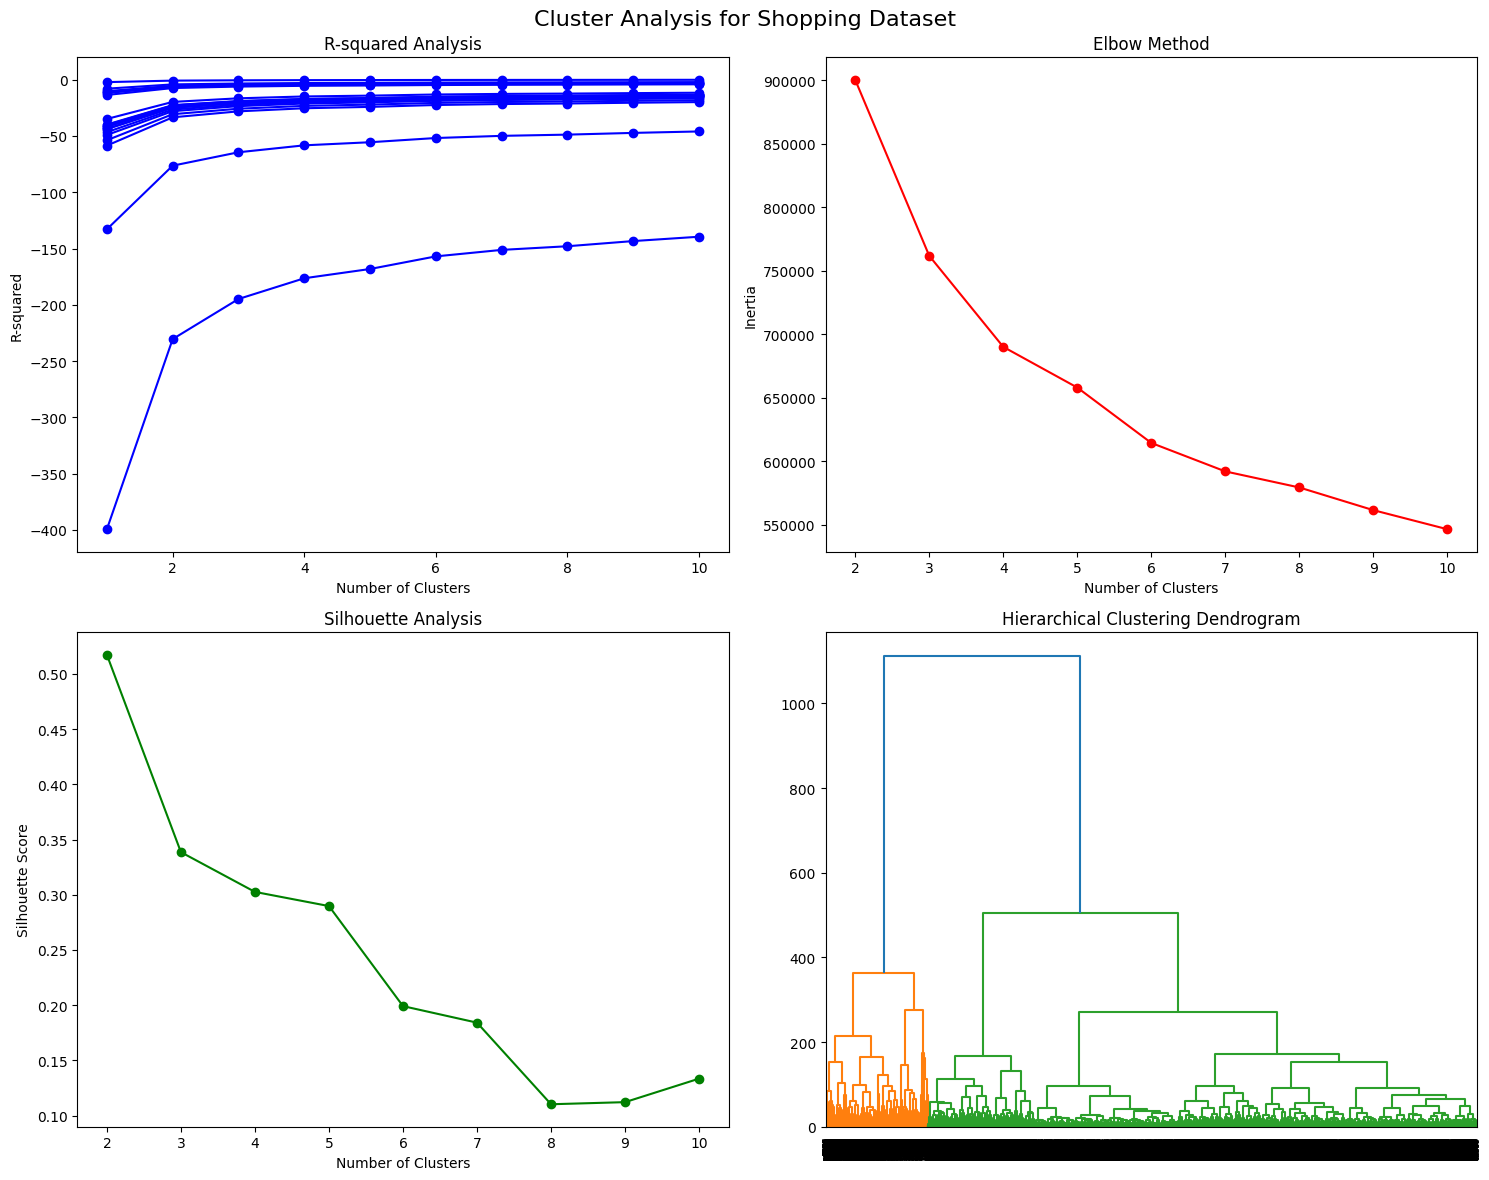


=== Shopping Dataset Analysis ===
Number of features: 19
Number of samples: 31737
Silhouette Score: 0.303
Inertia: 690076.817

Cluster Sizes:
Cluster 0: 8424 samples
Cluster 1: 18577 samples
Cluster 2: 667 samples
Cluster 3: 4069 samples


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

RecursionError: maximum recursion depth exceeded in __instancecheck__

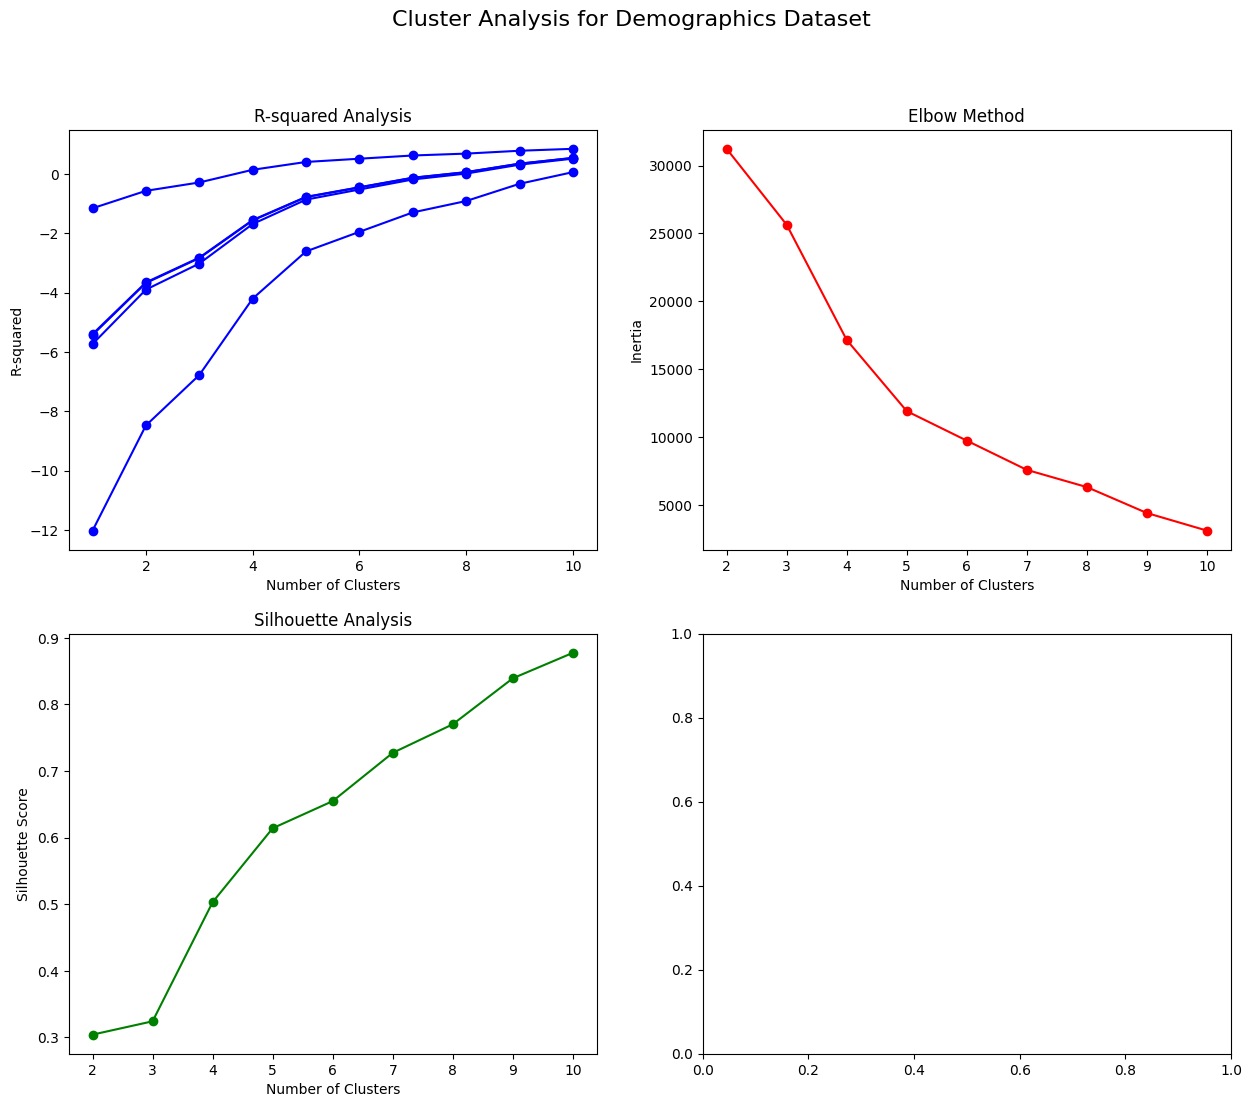

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def analyze_single_dataset(df, name, max_clusters=10):
    """Analyze clusters for a single dataset"""
    r_squared = []
    inertias = []
    silhouette_scores = []

    # R-squared analysis
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        r_squared.append(1 - kmeans.inertia_ / np.sum((df - df.mean(axis=0))**2))

    # Elbow and silhouette
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df, kmeans.labels_))

    # Plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Cluster Analysis for {name} Dataset', fontsize=16)

    axes[0,0].plot(range(1, max_clusters + 1), r_squared, 'bo-')
    axes[0,0].set_title('R-squared Analysis')
    axes[0,0].set_xlabel('Number of Clusters')
    axes[0,0].set_ylabel('R-squared')

    axes[0,1].plot(range(2, max_clusters + 1), inertias, 'ro-')
    axes[0,1].set_title('Elbow Method')
    axes[0,1].set_xlabel('Number of Clusters')
    axes[0,1].set_ylabel('Inertia')

    axes[1,0].plot(range(2, max_clusters + 1), silhouette_scores, 'go-')
    axes[1,0].set_title('Silhouette Analysis')
    axes[1,0].set_xlabel('Number of Clusters')
    axes[1,0].set_ylabel('Silhouette Score')

    linkage_matrix = linkage(df, method='ward')
    dendrogram(linkage_matrix, ax=axes[1,1])
    axes[1,1].set_title('Hierarchical Clustering Dendrogram')

    plt.tight_layout()
    plt.show()

def print_dataset_summary(df, name, optimal_k):
    """Print summary for a single dataset"""
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    labels = kmeans.fit_predict(df)

    print(f"\n=== {name} Dataset Analysis ===")
    print(f"Number of features: {df.shape[1]}")
    print(f"Number of samples: {df.shape[0]}")
    print(f"Silhouette Score: {silhouette_score(df, labels):.3f}")
    print(f"Inertia: {kmeans.inertia_:.3f}")

    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print("\nCluster Sizes:")
    for cluster, size in cluster_sizes.items():
        print(f"Cluster {cluster}: {size} samples")

# Analysis for each dataset
datasets = {
    'Values': df_val,
    'Preferences': df_pref,
    'Shopping': df_shop,
    'Demographics': df_dem
}

for name, df in datasets.items():
    analyze_single_dataset(df, name)
    print_dataset_summary(df, name, optimal_k=4)

 **notes:**

 value_engagement_metrics 0.37 sil
 preference_metrics 0.16 sil
 shopping_behavior_metrics 0.300 sil
 demographic_metrics. error likely due to categoricals (ofcourse)

 === Shopping Dataset Analysis ===
Number of features: 19
Number of samples: 31737
Silhouette Score: 0.303
Inertia: 690076.817

=== Preferences Dataset Analysis ===
Number of features: 15
Number of samples: 31737
Silhouette Score: 0.169
Inertia: 8076.976

=== Values Dataset Analysis ===
Number of features: 8
Number of samples: 31737
Silhouette Score: 0.376
Inertia: 17577654.865





***plan:***

split numericals from categoricals,

reduce feature amounts in preferences and shopping,

improve silhouette overall and find ideal model
